Proyek Analisis Data: Analisis Bike Sharing Dataset

- Nama : Baiq Putri Suartikha
- Email : baiqputrisuartikha239@gmail.com
- ID Dicoding : Baiqputris

# Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana Pengaruh Cuaca dan Musim Terhadap Jumlah Penyewaan Sepeda?
- Pertanyaan 2: Pada Jam Berapa Penyewaan Sepeda Terjadi Paling Banyak?
-Pertanyaan  3: Bagaimana Segmen Waktu Penyewaan Sepeda Berdasarkan RFM Analysis?

## Import Semua Packages/Library yang Digunakan

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data Wrangling

## Gathering Data

#### Background
Sistem berbagi sepeda adalah inovasi dari persewaan sepeda tradisional dengan proses otomatis untuk keanggotaan, penyewaan, dan pengembalian. Pengguna dapat menyewa sepeda dari satu lokasi dan mengembalikannya ke lokasi lain. Saat ini, terdapat lebih dari 500 program berbagi sepeda di dunia dengan lebih dari 500 ribu sepeda, yang berkontribusi pada transportasi, lingkungan, dan kesehatan.

Sistem ini menghasilkan data unik yang dapat digunakan untuk penelitian, berbeda dari transportasi lain seperti bus atau kereta. Dengan mencatat durasi perjalanan serta lokasi awal dan akhir, sistem berbagi sepeda berfungsi sebagai jaringan sensor virtual untuk mendeteksi mobilitas kota dan mengidentifikasi peristiwa penting melalui analisis data.

#### Dataset
Pola persewaan sepeda sangat dipengaruhi oleh faktor lingkungan dan musim seperti cuaca, curah hujan, hari, musim, dan jam dalam sehari. Dataset ini mencakup data historis selama dua tahun (2011–2012) dari sistem Capital Bikeshare di Washington D.C., dikumpulkan setiap dua jam dan harian. Data cuaca diperoleh dari freemeteo.com.

#### Dataset characteristics
Dataset terdiri dari hour.csv dan day.csv, dengan beberapa variabel utama:

- instant: indeks data
- dteday: tanggal
- season: musim (1: semi, 2: panas, 3: gugur, 4: dingin)
- yr: tahun (0: 2011, 1: 2012)
- mnth: bulan (1–12)
- hr: jam (hanya di hour.csv, 0–23)
- holiday: hari libur atau tidak
- weekday: hari dalam seminggu
- workingday: hari kerja (1: bukan akhir pekan/libur, 0: lainnya)
- weathersit: kondisi cuaca (1: cerah, 2: berkabut, 3: hujan ringan/salju, 4: hujan lebat/salju tebal)
- temp, atemp: suhu normalisasi
- hum: kelembaban normalisasi
- windspeed: kecepatan angin normalisasi
- casual: jumlah penyewa non-anggota
- registered: jumlah penyewa terdaftar
- cnt: total penyewa (casual + registered)

### Load data

In [20]:
day_data = pd.read_csv('day.csv')
hour_data = pd.read_csv('hour.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'day.csv'

In [ ]:
# load days data
days_df = pd.read_csv('day.csv')
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# load hours data
hours_df = pd.read_csv('hour.csv')
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Assesing Data

### Dataset Information days_df

In [ ]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
days_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Dataset Information hours_df

In [ ]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
hours_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
bikes_df = hours_df.copy()

In [ ]:
print('\nPengolahan Data')
print('Data Harian:')
print(day_data.head())
print('\nData Per Jam:')
print(hour_data.head())


Pengolahan Data
Data Harian:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  160

# Cleaning Data

In [ ]:
# rename kolom
bikes_df.rename(columns={
    'instant':'rec_id',
    'dteday':'datetime',
    'holiday':'is_holiday',
    'workingday':'is_workingday',
    'weathersit':'weather_condition',
    'hum':'humidity',
    'mnth':'month',
    'cnt':'total_count',
    'yr':'year',
    'hr' : 'hour'
}, inplace=True)

In [ ]:
# Mengubah tipe data untuk kolom tanggal menjadi datetime
bikes_df['datetime'] = pd.to_datetime(bikes_df['datetime'], format='%Y-%m-%d')

# Mengonversi beberapa kolom numerik menjadi tipe kategori untuk analisis yang lebih akurat
categorical_columns = ['season', 'year', 'month', 'hour', 'is_holiday', 'weekday', 'is_workingday', 'weather_condition']
bikes_df[categorical_columns] = bikes_df[categorical_columns].astype('category')

In [ ]:
print(bikes_df.columns)

Index(['rec_id', 'datetime', 'season', 'year', 'month', 'hour', 'is_holiday',
       'weekday', 'is_workingday', 'weather_condition', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'total_count'],
      dtype='object')


In [ ]:
# Mapping categorical variables to meaningful labels
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
month_mapping = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'June',
    7: 'July', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
weather_mapping = {1: 'Clear', 2: 'Mist + Cloudy', 3: 'Light Snow', 4: 'Snow + Fog'}
weekday_mapping = {0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'}

# Apply mappings to the DataFrame
bikes_df['season'] = bikes_df['season'].map(season_mapping)
bikes_df['month'] = bikes_df['month'].map(month_mapping)
bikes_df['weather_condition'] = bikes_df['weather_condition'].map(weather_mapping)
bikes_df['weekday'] = bikes_df['weekday'].map(weekday_mapping)

# Display the first few rows
bikes_df.head()

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,Spring,0,Jan,0,0,Sat,0,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,0,Jan,1,0,Sat,0,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,0,Jan,2,0,Sat,0,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,0,Jan,3,0,Sat,0,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,0,Jan,4,0,Sat,0,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
# Checking the unique values in the data
bikes_df.nunique().sort_values()

,0
is_workingday,2
year,2
is_holiday,2
season,4
weather_condition,4
weekday,7
month,12
hour,24
windspeed,30
temp,50


# Exploratory Data Analysis

- Memilih hanya kolom numerik untuk menghitung korelasi

In [ ]:
numeric_columns = day_data.select_dtypes(include=['number'])

### Heatmap

- Membuat Heatmap korelasi untuk kolom numerik


Analisis Data Eksploratif
Heatmap Korelasi untuk Data Harian:


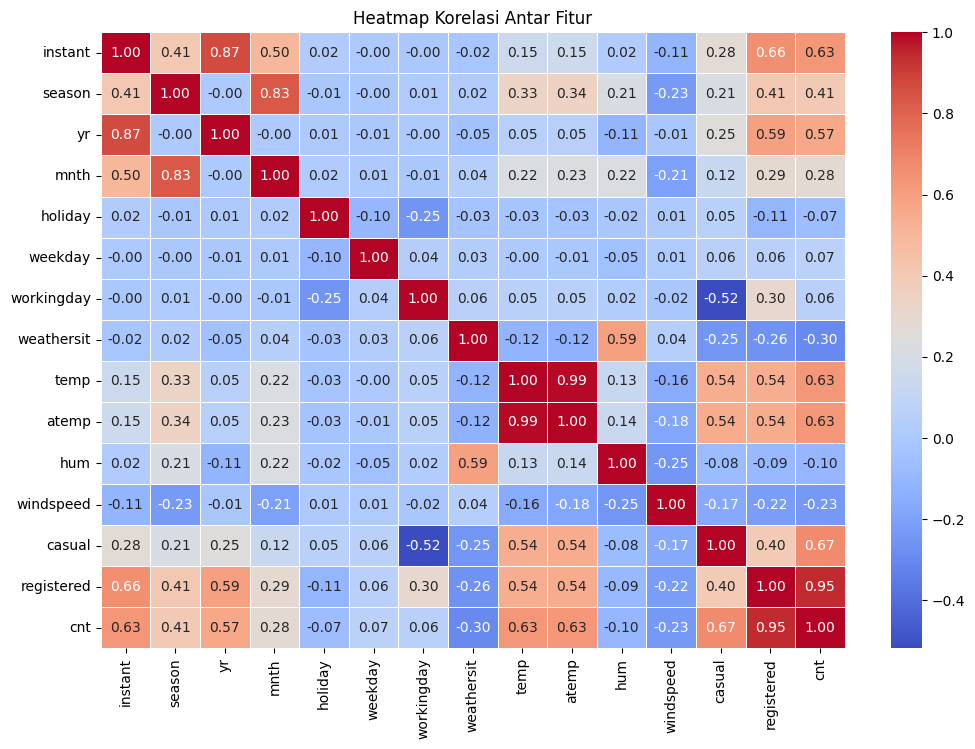

In [ ]:
print('\nAnalisis Data Eksploratif')
print('Heatmap Korelasi untuk Data Harian:')
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

## Visualization & Explanatory Analysis

Data Visualization


Visualisasi Data Penyewaan Sepeda
Distribusi Jumlah Penyewaan Sepeda:


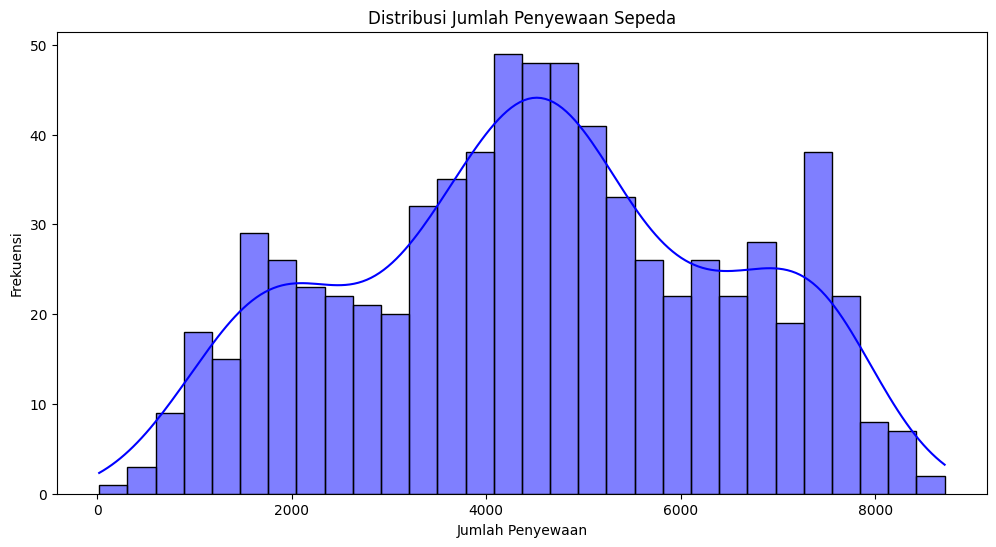

In [ ]:
print('\nVisualisasi Data Penyewaan Sepeda')
print('Distribusi Jumlah Penyewaan Sepeda:')
plt.figure(figsize=(12, 6))
sns.histplot(day_data['cnt'], bins=30, kde=True, color='blue')
plt.title('Distribusi Jumlah Penyewaan Sepeda')
plt.xlabel('Jumlah Penyewaan')
plt.ylabel('Frekuensi')
plt.show()

Pertanyaan Bisnis 1: Bagaimana Pengaruh Cuaca dan Musim Terhadap Jumlah Penyewaan Sepeda?


Pengaruh Cuaca dan Musim Terhadap Jumlah Penyewaan Sepeda


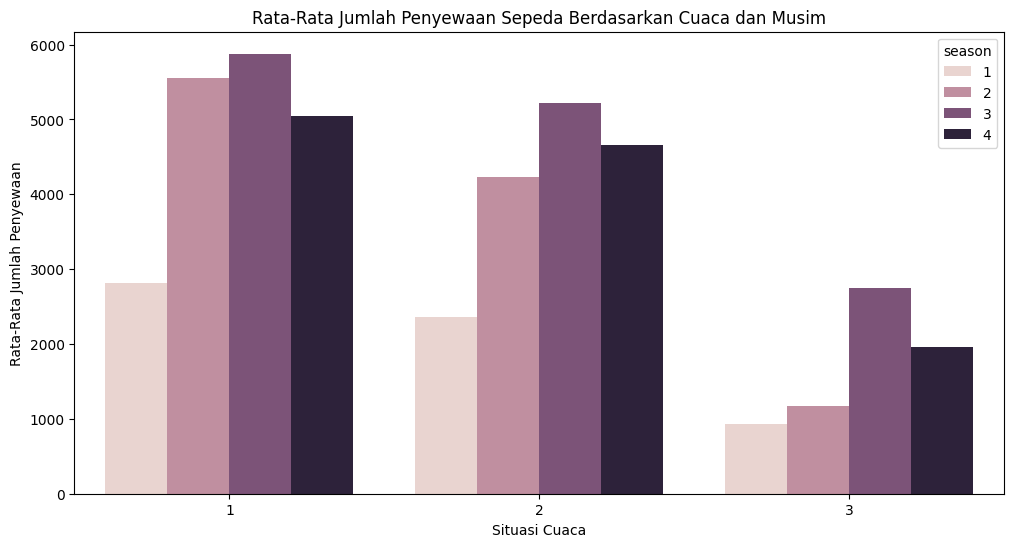

In [ ]:
print('\nPengaruh Cuaca dan Musim Terhadap Jumlah Penyewaan Sepeda')
weather_season_grouped = day_data.groupby(['weathersit', 'season']).agg({'cnt': 'mean'}).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='weathersit', y='cnt', hue='season', data=weather_season_grouped)
plt.title('Rata-Rata Jumlah Penyewaan Sepeda Berdasarkan Cuaca dan Musim')
plt.xlabel('Situasi Cuaca')
plt.ylabel('Rata-Rata Jumlah Penyewaan')
plt.show()

Pertanyaan Bisnis 2: Pada Jam Berapa Penyewaan Sepeda Terjadi Paling Banyak


Jam-Jam Sibuk untuk Penyewaan Sepeda


<ipython-input-80-18cd11abcd6b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hr', y='cnt', data=hour_grouped, palette='Blues_d')


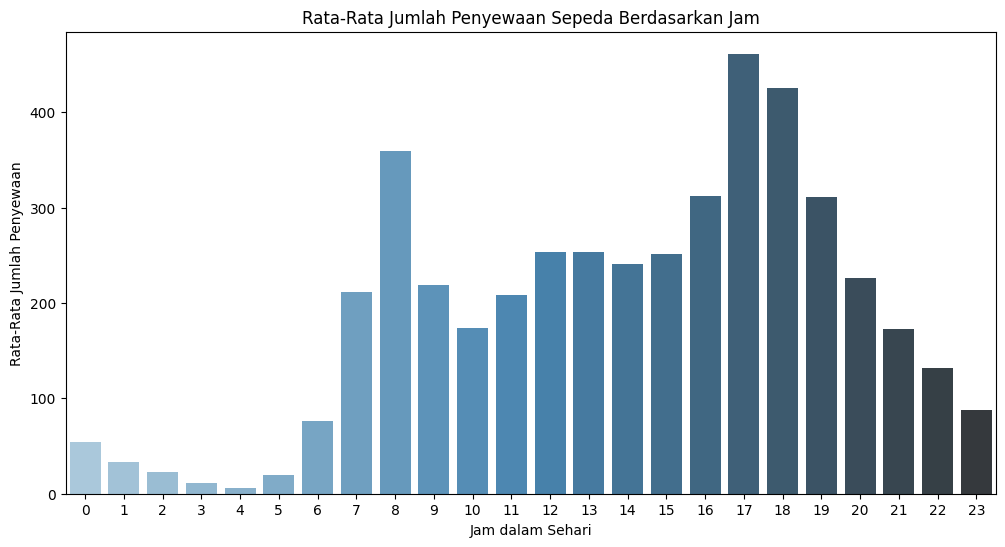

In [ ]:
print('\nJam-Jam Sibuk untuk Penyewaan Sepeda')
hour_grouped = hour_data.groupby('hr').agg({'cnt': 'mean'}).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='hr', y='cnt', data=hour_grouped, palette='Blues_d')
plt.title('Rata-Rata Jumlah Penyewaan Sepeda Berdasarkan Jam')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Rata-Rata Jumlah Penyewaan')
plt.show()


Pertanyaan Bisnis 3: Bagaimana Segmen Waktu Penyewaan Sepeda Berdasarkan RFM Analysis?

In [ ]:
print('Segmen Waktu Penyewaan Sepeda Berdasarkan RFM Analysis')
day_data['dteday'] = pd.to_datetime(day_data['dteday'])
day_data['days_since_last'] = (day_data['dteday'].max() - pd.to_datetime(day_data['dteday'])).dt.days
rfm = day_data.groupby('days_since_last').agg({
    'days_since_last': 'min',
    'instant': 'count',
    'cnt': 'sum'
}).rename(columns={
    'days_since_last': 'Recency',
    'instant': 'Frequency',
    'cnt': 'Monetary'
}).reset_index(drop=True)
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])
rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm['RFM_Score'] = rfm[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)
print('Tabel Hasil RFM Analysis:')
display(rfm.head())

Segmen Waktu Penyewaan Sepeda Berdasarkan RFM Analysis
Tabel Hasil RFM Analysis:


,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score
0,0,1,2729,4,1,1,411,6
1,1,1,1796,4,1,1,411,6
2,2,1,1341,4,1,1,411,6
3,3,1,3095,4,1,1,411,6
4,4,1,2114,4,1,1,411,6


- Mengidentifikasi anomali dalam penyewaan sepeda


Identifikasi Anomali dalam Penyewaan Sepeda


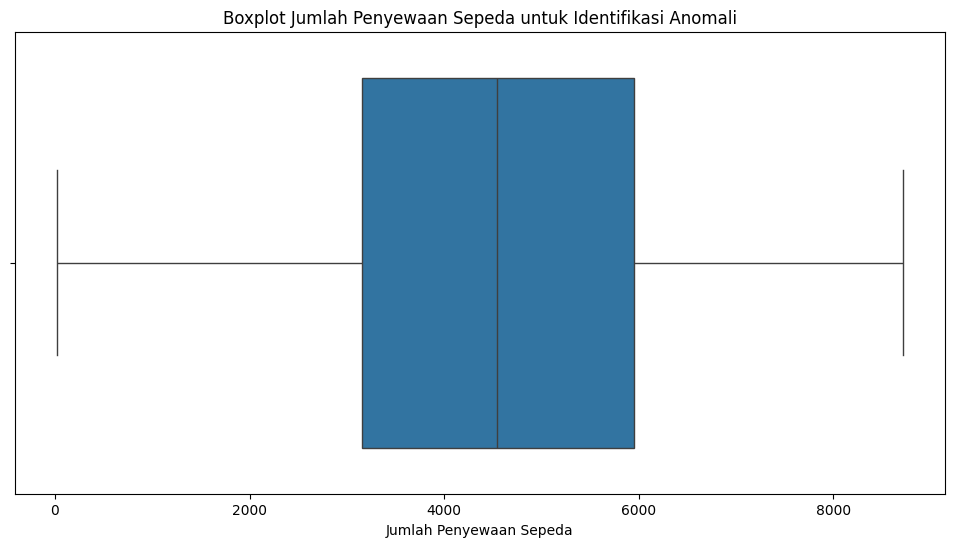

In [ ]:
print('\nIdentifikasi Anomali dalam Penyewaan Sepeda')
plt.figure(figsize=(12, 6))
sns.boxplot(x=day_data['cnt'])
plt.title('Boxplot Jumlah Penyewaan Sepeda untuk Identifikasi Anomali')
plt.xlabel('Jumlah Penyewaan Sepeda')
plt.show()

Kesimpulan

- Kesimpulan Pertanyaan 1 : Dari analisis yang dilakukan, ditemukan bahwa **cuaca dan musim** memiliki pengaruh signifikan terhadap jumlah penyewaan sepeda. Kondisi cuaca yang lebih baik serta musim yang lebih hangat cenderung meningkatkan jumlah pengguna layanan penyewaan sepeda, hal ini menunjukkan bahwa faktor lingkungan berperan penting dalam tren penggunaan sepeda.

- Kesimpulan Pertanyaan 2 : Dari analisis waktu dalam sehari, terlihat bahwa **jam sibuk** penyewaan sepeda terjadi pada pagi hari sekitar pukul 08.00 dan sore hari sekitar pukul 17.00. Pola ini kemungkinan besar terkait dengan waktu berangkat dan pulang kerja, yang menunjukkan bahwa banyak pengguna memanfaatkan layanan penyewaan sepeda sebagai sarana transportasi utama dalam rutinitas harian mereka.

- Kesimpulan pertanyaan 3 : Dari hasil RFM Analysis, terlihat bahwa **segmen waktu** dengan nilai RFM tinggi cenderung memiliki frekuensi tinggi dan total penyewaan yang besar,
sehingga menjadi segmen yang paling aktif dalam penyewaan sepeda.